# Forecast Summary

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

FILE_PATH = r"\\GIMECB01\HOMEDIR-VZ$\westenb\Thesis\Data\Forecast_Ready.csv"

df = pd.read_csv(FILE_PATH)
df['CURRENT_DATE'] = pd.to_datetime(df['CURRENT_DATE'])

PCS = [1, 2, 3, 4]

# Compute differences
for pc in PCS:
    df[f'DIFF_PC{pc}'] = df[f'FUTURE_PC{pc}'] - df[f'CURRENT_PC{pc}']

# Results storage
results_summary = []

for pc in PCS:
    diff_col = f'DIFF_PC{pc}'
    pred_col = f'FUTURE_PC{pc}_PREDICTION'
    dir_col  = f'FUTURE_PC{pc}_DIRECTION'

    valid = df[pred_col].notna() & df[diff_col].notna() & df[dir_col].notna()
    df_v  = df.loc[valid].copy()

    accuracy = (df_v[dir_col].astype(int) == df_v[pred_col].astype(int)).mean()
    
    # Class balance
    n_up = (df_v[dir_col] == 1).sum()
    n_down = (df_v[dir_col] == 0).sum()

    print(f"\n{'='*70}")
    print(f"  PC{pc}")
    print(f"{'='*70}")
    print(f"  Total predictions : {len(df_v)}")
    print(f"  Accuracy          : {accuracy:.4f} ({accuracy*100:.2f}%)")
    print(f"  Class balance     : Up={n_up} ({n_up/len(df_v)*100:.1f}%), "
          f"Down={n_down} ({n_down/len(df_v)*100:.1f}%)")

    results_summary.append({
        'PC': pc,
        'n': len(df_v),
        'accuracy': accuracy,
        'n_up': n_up,
        'n_down': n_down
    })

    # Conditional statistics for each prediction class
    for pred_val, label, color in [
        (1, 'Predicted Up (pred=1)',   '#2E86AB'),  # Professional blue
        (0, 'Predicted Down (pred=0)', '#C1666B')   # Professional red
    ]:
        subset = df_v.loc[df_v[pred_col] == pred_val, diff_col]
        
        if len(subset) == 0:
            continue

        print(f"\n  {label}  (n={len(subset)})")
        print(f"    Mean     : {subset.mean():.6f}")
        print(f"    Median   : {subset.median():.6f}")
        print(f"    Std      : {subset.std():.6f}")
        print(f"    Skew     : {stats.skew(subset):.4f}")
        print(f"    Kurtosis : {stats.kurtosis(subset):.4f}")
        print(f"    Min      : {subset.min():.6f}")
        print(f"    Q25      : {subset.quantile(0.25):.6f}")
        print(f"    Q75      : {subset.quantile(0.75):.6f}")
        print(f"    Max      : {subset.max():.6f}")

        # Create individual plot
        fig, ax = plt.subplots(figsize=(6, 4))
        
        ax.hist(subset, bins=40, color=color, edgecolor='white', 
                alpha=0.8, linewidth=0.5)
        
        # Reference lines
        ax.axvline(0, color='black', linewidth=1.2, linestyle='--', 
                   alpha=0.7, label='Zero')
        ax.axvline(subset.mean(), color='darkred', linewidth=1.5, 
                   linestyle='-', label=f'Mean = {subset.mean():.4f}')
        ax.axvline(subset.median(), color='darkblue', linewidth=1.5, 
                   linestyle=':', label=f'Median = {subset.median():.4f}')
        
        # Labels and formatting
        ax.set_xlabel(f'$\Delta$ PC{pc} (actual change)', fontsize=11)
        ax.set_ylabel('Frequency', fontsize=11)
        ax.legend(loc='best', fontsize=9, framealpha=0.95)
        ax.grid(True, alpha=0.25, linewidth=0.5)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        
        plt.tight_layout()
        
        # Save with descriptive filename
        pred_label = 'up' if pred_val == 1 else 'down'
        filename = f'pc{pc}_conditional_dist_{pred_label}.png'
        plt.savefig(filename, dpi=300, bbox_inches='tight')
        print(f"    → Saved: {filename}")
        plt.close()

# Summary table
print(f"\n{'='*70}")
print("SUMMARY — Overall Accuracy by PC")
print(f"{'='*70}")
print(f"{'PC':<6} {'n':<8} {'Accuracy':<12} {'Up/Down Balance'}")
print(f"{'-'*70}")
for r in results_summary:
    print(f"PC{r['PC']:<4} {r['n']:<8} {r['accuracy']:.4f} ({r['accuracy']*100:.2f}%)   "
          f"{r['n_up']}/{r['n_down']} ({r['n_up']/r['n']:.1%}/{r['n_down']/r['n']:.1%})")
print(f"{'='*70}\n")


  PC1
  Total predictions : 5080
  Accuracy          : 0.6685 (66.85%)
  Class balance     : Up=2525 (49.7%), Down=2555 (50.3%)

  Predicted Up (pred=1)  (n=2395)
    Mean     : 0.003958
    Median   : 0.003634
    Std      : 0.010470
    Skew     : -0.0681
    Kurtosis : 2.9753
    Min      : -0.054638
    Q25      : -0.001720
    Q75      : 0.009456
    Max      : 0.050669
    → Saved: pc1_conditional_dist_up.png

  Predicted Down (pred=0)  (n=2685)
    Mean     : -0.003596
    Median   : -0.003529
    Std      : 0.009248
    Skew     : -0.2763
    Kurtosis : 1.6121
    Min      : -0.051605
    Q25      : -0.008899
    Q75      : 0.002256
    Max      : 0.033493
    → Saved: pc1_conditional_dist_down.png

  PC2
  Total predictions : 5080
  Accuracy          : 0.6593 (65.93%)
  Class balance     : Up=2521 (49.6%), Down=2559 (50.4%)

  Predicted Up (pred=1)  (n=2554)
    Mean     : 0.001209
    Median   : 0.000830
    Std      : 0.003416
    Skew     : 1.3378
    Kurtosis : 9.5350
   

# Loadings factor forecasting

C:\Users\westenb\AppData\Local\Temp\ipykernel_5100\588672659.py:15: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['FORECASTED_DATE'] = pd.to_datetime(df['FORECASTED_DATE'])



Forecast date  : 2024-06-24
Current date   : 2024-05-24
Lookback rows  : 300

  PC1  |  Today pred=Down  |  Lookback acc: 57.67%
    Up   (n=171): mean=+0.003030  Q25=-0.005249  Q75=+0.010622  min=-0.039506  max=+0.037339
    Down (n=129): mean=-0.003245  Q25=-0.008381  Q75=+0.003792  min=-0.045828  max=+0.024494

  PC2  |  Today pred=Down  |  Lookback acc: 73.00%
    Up   (n=162): mean=+0.002659  Q25=+0.000496  Q75=+0.004884  min=-0.006811  max=+0.013605
    Down (n=138): mean=-0.001262  Q25=-0.004032  Q75=+0.001860  min=-0.008981  max=+0.005369

  PC3  |  Today pred=Down  |  Lookback acc: 67.33%
    Up   (n=162): mean=+0.000475  Q25=-0.000427  Q75=+0.001064  min=-0.002126  max=+0.005093
    Down (n=138): mean=-0.000733  Q25=-0.001481  Q75=+0.000093  min=-0.005024  max=+0.001582

  PC4  |  Today pred=Up  |  Lookback acc: 55.00%
    Up   (n=199): mean=+0.000032  Q25=-0.000245  Q75=+0.000262  min=-0.000613  max=+0.001100
    Down (n=101): mean=-0.000086  Q25=-0.000321  Q75=+0.000117  m

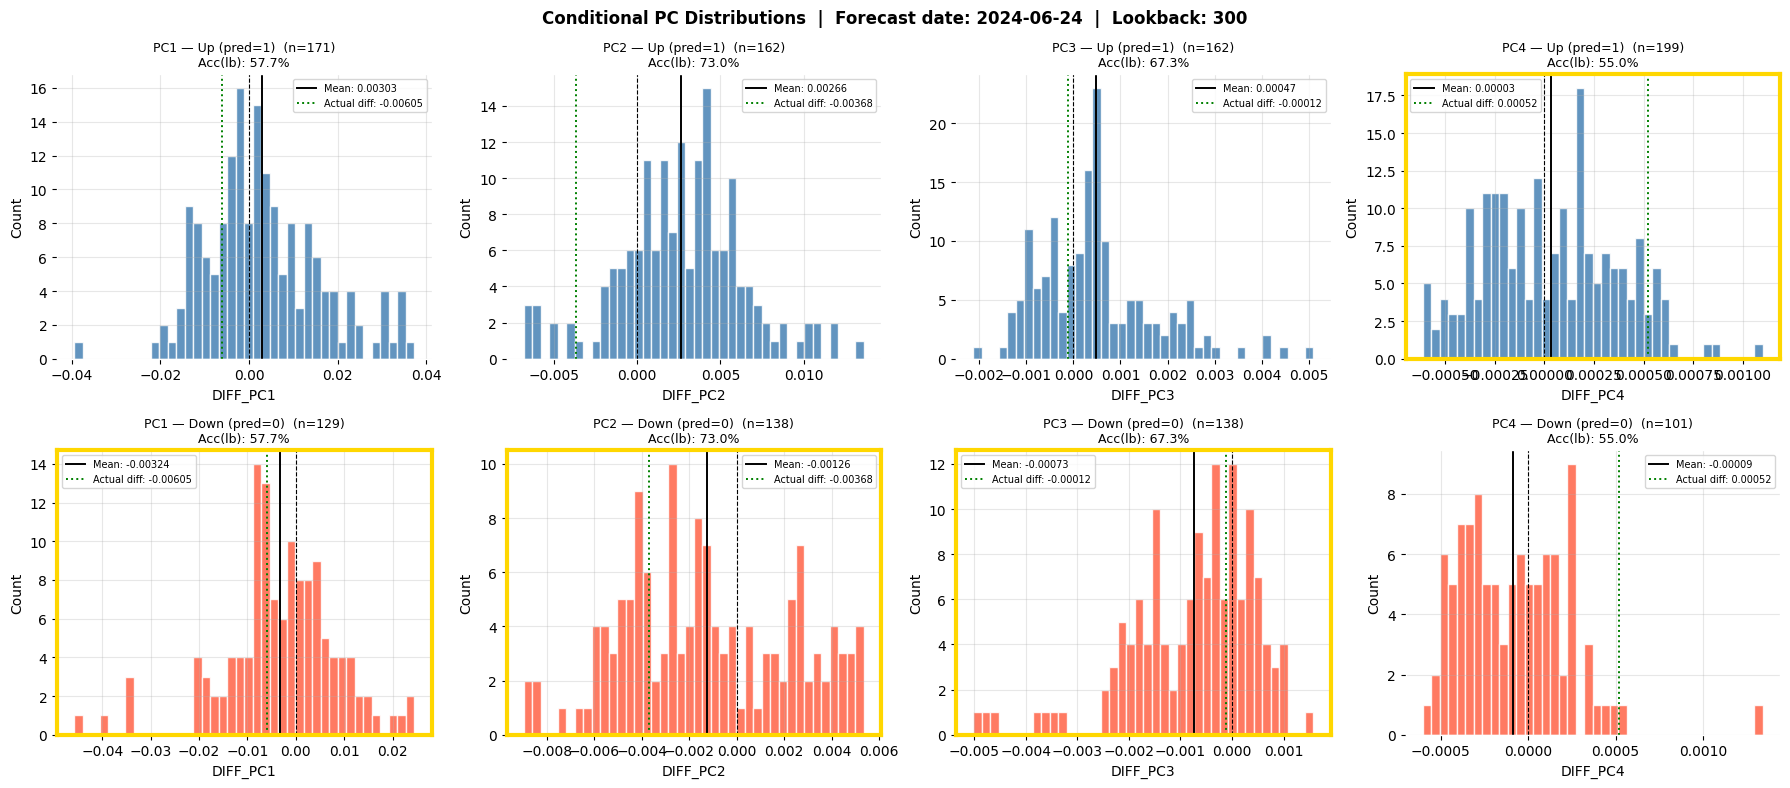

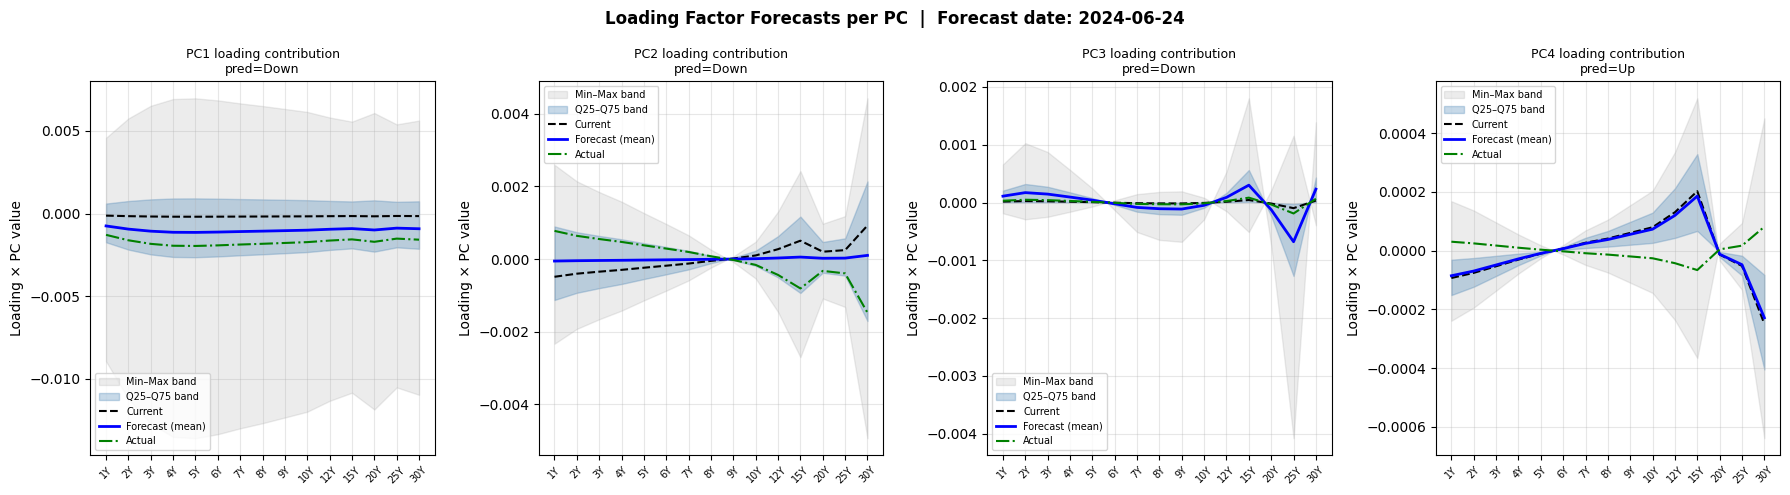

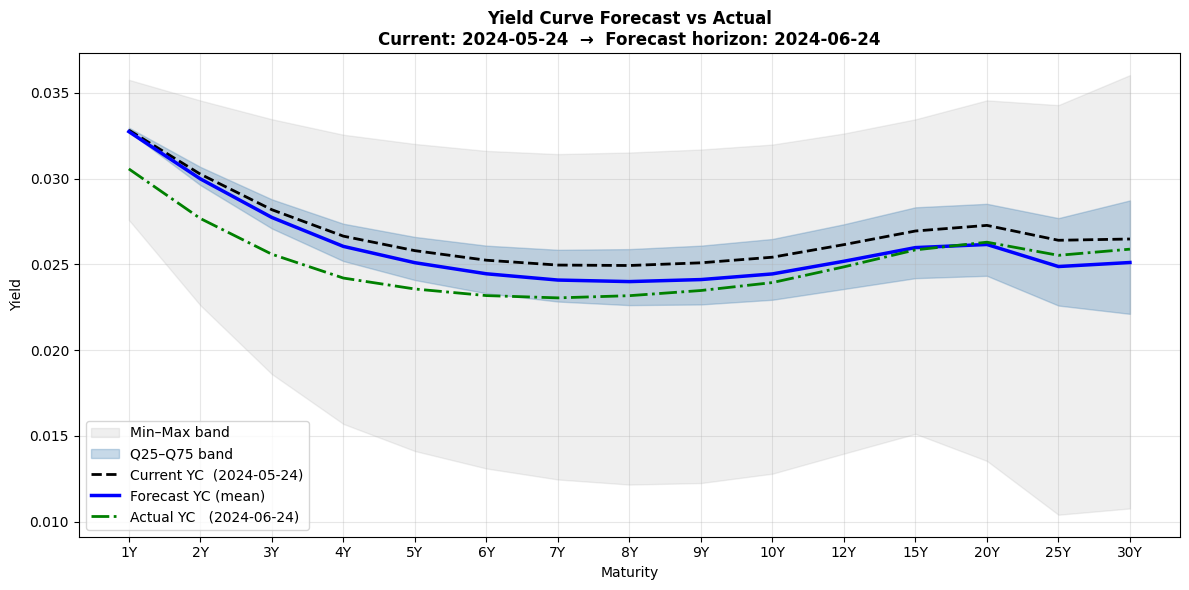


────────────────────────────────────────────────────────────
  Yield Curve Summary  |  Forecast: 2024-06-24
────────────────────────────────────────────────────────────
    Mat     Current    Forecast      Actual  Error (bp)
  ─────  ──────────  ──────────  ──────────  ──────────
     1Y      0.0328      0.0327      0.0306       +21.7
     2Y      0.0303      0.0300      0.0277       +23.1
     3Y      0.0282      0.0277      0.0256       +21.4
     4Y      0.0266      0.0260      0.0242       +18.5
     5Y      0.0258      0.0251      0.0236       +15.3
     6Y      0.0252      0.0244      0.0232       +12.7
     7Y      0.0250      0.0241      0.0230       +10.4
     8Y      0.0249      0.0240      0.0232        +8.2
     9Y      0.0251      0.0241      0.0235        +6.4
    10Y      0.0254      0.0244      0.0239        +5.1
    12Y      0.0261      0.0252      0.0249        +3.3
    15Y      0.0269      0.0260      0.0258        +1.3
    20Y      0.0273      0.0262      0.0263   

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

FILE_PATH  = r"\\GIMECB01\HOMEDIR-VZ$\westenb\Thesis\Data\Forecast_Ready.csv"
YC_PATH    = r"\\GIMECB01\HOMEDIR-VZ$\westenb\Thesis\Data\DE_YieldCurve.csv"

MATURITIES = ['1Y','2Y','3Y','4Y','5Y','6Y','7Y','8Y','9Y','10Y','12Y','15Y','20Y','25Y','30Y']
PCS        = [1, 2, 3, 4]

# ── Load once at module level ──────────────────────────────────────────────────
df = pd.read_csv(FILE_PATH)
df['CURRENT_DATE']    = pd.to_datetime(df['CURRENT_DATE'])
df['FORECASTED_DATE'] = pd.to_datetime(df['FORECASTED_DATE'])

for pc in PCS:
    df[f'DIFF_PC{pc}'] = df[f'FUTURE_PC{pc}'] - df[f'CURRENT_PC{pc}']

yc = pd.read_csv(YC_PATH)
yc['REFERENCE_DATE'] = pd.to_datetime(yc['REFERENCE_DATE'])
yc = yc.set_index('REFERENCE_DATE')

# Loadings are fixed — take from first valid row
loadings = {}   # loadings[pc][mat] = float
for pc in PCS:
    loadings[pc] = {}
    for mat in MATURITIES:
        col = f'L_{mat}_PC{pc}'
        loadings[pc][mat] = df[col].iloc[0]


# ── Main function ──────────────────────────────────────────────────────────────
def forecast_yield_curve(forecast_date, lookback=200):
    """
    forecast_date : str or datetime — the FORECASTED_DATE to analyse
    lookback      : number of past rows to build conditional distributions from
    """
    forecast_date = pd.Timestamp(forecast_date)

    # Find the row for this forecast date
    mask = df['FORECASTED_DATE'] == forecast_date
    if mask.sum() == 0:
        raise ValueError(f"No row found with FORECASTED_DATE = {forecast_date.date()}")

    row_idx  = df.index[mask][0]
    row      = df.loc[row_idx]
    cur_date = row['CURRENT_DATE']

    # Lookback window: rows strictly before this row
    lb_df = df.loc[:row_idx - 1 - 21].tail(lookback)
    n_lb  = len(lb_df)
    print(f"\nForecast date  : {forecast_date.date()}")
    print(f"Current date   : {cur_date.date()}")
    print(f"Lookback rows  : {n_lb}")

    # ── Per-PC conditional distributions ──────────────────────────────────────
    pc_stats   = {}   # pc_stats[pc] = dict with mean/q25/q75/min/max per pred class
    pred_today = {}   # current model prediction for each PC

    fig_dist, axes_dist = plt.subplots(2, 4, figsize=(18, 8))
    fig_dist.suptitle(
        f'Conditional PC Distributions  |  Forecast date: {forecast_date.date()}  '
        f'|  Lookback: {n_lb}',
        fontsize=12, fontweight='bold'
    )

    for i, pc in enumerate(PCS):
        diff_col = f'DIFF_PC{pc}'
        pred_col = f'FUTURE_PC{pc}_PREDICTION'
        dir_col  = f'FUTURE_PC{pc}_DIRECTION'

        pred_today[pc] = int(row[pred_col])
        cur_pc         = row[f'CURRENT_PC{pc}']
        fut_pc         = row[f'FUTURE_PC{pc}']   # realised

        valid_lb = lb_df[diff_col].notna() & lb_df[pred_col].notna()
        lb_valid = lb_df.loc[valid_lb]

        acc = (lb_valid[dir_col].astype(int) == lb_valid[pred_col].astype(int)).mean()

        pc_stats[pc] = {}
        for pred_val, label, color, ax in [
            (1, 'Up (pred=1)',   'steelblue', axes_dist[0, i]),
            (0, 'Down (pred=0)', 'tomato',    axes_dist[1, i])
        ]:
            subset = lb_valid.loc[lb_valid[pred_col] == pred_val, diff_col]
            if len(subset) == 0:
                ax.set_title(f'PC{pc} — {label}\n(no data)')
                continue

            pc_stats[pc][pred_val] = {
                'mean': subset.mean(),
                'q25':  subset.quantile(0.25),
                'q75':  subset.quantile(0.75),
                'min':  subset.min(),
                'max':  subset.max(),
                'n':    len(subset)
            }

            ax.hist(subset, bins=40, color=color, edgecolor='white', alpha=0.85)
            ax.axvline(0,             color='black', lw=0.8, ls='--')
            ax.axvline(subset.mean(), color='black', lw=1.4, ls='-',
                       label=f'Mean: {subset.mean():.5f}')

            # Mark today's actual diff
            actual_diff = fut_pc - cur_pc
            ax.axvline(actual_diff, color='green', lw=1.4, ls=':',
                       label=f'Actual diff: {actual_diff:.5f}')

            # Highlight if this is today's prediction
            border_color = 'gold' if pred_val == pred_today[pc] else 'white'
            for spine in ax.spines.values():
                spine.set_edgecolor(border_color)
                spine.set_linewidth(3 if pred_val == pred_today[pc] else 1)

            ax.set_title(f'PC{pc} — {label}  (n={len(subset)})\nAcc(lb): {acc:.1%}',
                         fontsize=9)
            ax.set_xlabel(f'DIFF_PC{pc}')
            ax.set_ylabel('Count')
            ax.legend(fontsize=7)
            ax.grid(True, alpha=0.3)

        # Print stats
        print(f"\n  PC{pc}  |  Today pred={'Up' if pred_today[pc]==1 else 'Down'}"
              f"  |  Lookback acc: {acc:.2%}")
        for pred_val, label in [(1,'Up'),(0,'Down')]:
            if pred_val in pc_stats[pc]:
                s = pc_stats[pc][pred_val]
                print(f"    {label:4s} (n={s['n']:3d}): "
                      f"mean={s['mean']:+.6f}  "
                      f"Q25={s['q25']:+.6f}  Q75={s['q75']:+.6f}  "
                      f"min={s['min']:+.6f}  max={s['max']:+.6f}")

    plt.tight_layout()
    plt.show()

    # ── Loading factor forecasts per PC ────────────────────────────────────────
    # For each PC use the conditional stats of today's prediction
    pred_diff = {}   # predicted diff stats per pc
    for pc in PCS:
        pv = pred_today[pc]
        if pv in pc_stats[pc]:
            pred_diff[pc] = pc_stats[pc][pv]
        else:
            pred_diff[pc] = {'mean':0,'q25':0,'q75':0,'min':0,'max':0}

    fig_load, axes_load = plt.subplots(1, 4, figsize=(18, 5), sharey=False)
    fig_load.suptitle(
        f'Loading Factor Forecasts per PC  |  Forecast date: {forecast_date.date()}',
        fontsize=12, fontweight='bold'
    )

    mat_idx = list(range(len(MATURITIES)))

    for i, pc in enumerate(PCS):
        ax = axes_load[i]
        cur_pc  = row[f'CURRENT_PC{pc}']
        fut_pc  = row[f'FUTURE_PC{pc}']
        s       = pred_diff[pc]

        load_vec    = np.array([loadings[pc][m] for m in MATURITIES])
        cur_contrib = load_vec * cur_pc
        fct_contrib = load_vec * (cur_pc + s['mean'])
        act_contrib = load_vec * fut_pc
        q25_contrib = load_vec * (cur_pc + s['q25'])
        q75_contrib = load_vec * (cur_pc + s['q75'])
        min_contrib = load_vec * (cur_pc + s['min'])
        max_contrib = load_vec * (cur_pc + s['max'])

        ax.fill_between(mat_idx, min_contrib, max_contrib,
                        alpha=0.15, color='grey',  label='Min–Max band')
        ax.fill_between(mat_idx, q25_contrib, q75_contrib,
                        alpha=0.3,  color='steelblue', label='Q25–Q75 band')
        ax.plot(mat_idx, cur_contrib, 'k--',  lw=1.5, label='Current')
        ax.plot(mat_idx, fct_contrib, 'b-',   lw=2,   label='Forecast (mean)')
        ax.plot(mat_idx, act_contrib, 'g-.',  lw=1.5, label='Actual')

        ax.set_title(f'PC{pc} loading contribution\npred={"Up" if pred_today[pc]==1 else "Down"}',
                     fontsize=9)
        ax.set_xticks(mat_idx)
        ax.set_xticklabels(MATURITIES, rotation=45, fontsize=7)
        ax.set_ylabel('Loading × PC value')
        ax.legend(fontsize=7)
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # ── Yield curve reconstruction ─────────────────────────────────────────────
    # current yield curve (at cur_date)
    if cur_date not in yc.index:
        # find nearest
        cur_date = yc.index[yc.index.get_indexer([cur_date], method='nearest')[0]]
    if forecast_date not in yc.index:
        fct_date_yc = yc.index[yc.index.get_indexer([forecast_date], method='nearest')[0]]
    else:
        fct_date_yc = forecast_date

    yc_current = yc.loc[cur_date,  [f'ZERO_{m}' for m in MATURITIES]].values.astype(float)
    yc_actual  = yc.loc[fct_date_yc, [f'ZERO_{m}' for m in MATURITIES]].values.astype(float)

    # Aggregate PC contributions across all 4 PCs
    def aggregate_yc_change(stat_key):
        change = np.zeros(len(MATURITIES))
        for pc in PCS:
            cur_pc = row[f'CURRENT_PC{pc}']
            s      = pred_diff[pc]
            load_v = np.array([loadings[pc][m] for m in MATURITIES])
            change += load_v * s[stat_key]
        return change

    yc_fct_mean = yc_current + aggregate_yc_change('mean')
    yc_fct_q25  = yc_current + aggregate_yc_change('q25')
    yc_fct_q75  = yc_current + aggregate_yc_change('q75')
    yc_fct_min  = yc_current + aggregate_yc_change('min')
    yc_fct_max  = yc_current + aggregate_yc_change('max')

    fig_yc, ax = plt.subplots(figsize=(12, 6))
    ax.fill_between(mat_idx, yc_fct_min, yc_fct_max,
                    alpha=0.12, color='grey',      label='Min–Max band')
    ax.fill_between(mat_idx, yc_fct_q25, yc_fct_q75,
                    alpha=0.3,  color='steelblue', label='Q25–Q75 band')
    ax.plot(mat_idx, yc_current,  'k--', lw=2,   label=f'Current YC  ({cur_date.date()})')
    ax.plot(mat_idx, yc_fct_mean, 'b-',  lw=2.5, label=f'Forecast YC (mean)')
    ax.plot(mat_idx, yc_actual,   'g-.',  lw=2,   label=f'Actual YC   ({fct_date_yc.date()})')

    ax.set_title(
        f'Yield Curve Forecast vs Actual\n'
        f'Current: {cur_date.date()}  →  Forecast horizon: {forecast_date.date()}',
        fontsize=12, fontweight='bold'
    )
    ax.set_xticks(mat_idx)
    ax.set_xticklabels(MATURITIES)
    ax.set_ylabel('Yield')
    ax.set_xlabel('Maturity')
    ax.legend()
    ax.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    # Summary table
    print(f"\n{'─'*60}")
    print(f"  Yield Curve Summary  |  Forecast: {forecast_date.date()}")
    print(f"{'─'*60}")
    print(f"  {'Mat':>5}  {'Current':>10}  {'Forecast':>10}  {'Actual':>10}  {'Error (bp)':>10}")
    print(f"  {'─'*5}  {'─'*10}  {'─'*10}  {'─'*10}  {'─'*10}")
    for j, mat in enumerate(MATURITIES):
        err_bp = (yc_fct_mean[j] - yc_actual[j]) * 10000
        print(f"  {mat:>5}  {yc_current[j]:>10.4f}  {yc_fct_mean[j]:>10.4f}"
              f"  {yc_actual[j]:>10.4f}  {err_bp:>+10.1f}")


# ── Example call ───────────────────────────────────────────────────────────────
forecast_yield_curve('2024-06-24', lookback=300)